This Exploratory Workbook aims to get a good overview of tourism datasets provided by World bank.

Understanding how to preprocess data, it's limitations, assumptions, what can be analyzed.

This would be a basis of ETL chain and vizualization in Tableau.

## 1. Import libraries and datasets

In [7]:
#import libraries
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#get all dataframes
arrivals_df = pd.read_csv('../data/input/main/arvl.csv', skiprows=3)
departures_df = pd.read_csv('../data/input/main/dprt.csv', skiprows=3)
expenditure_df = pd.read_csv('../data/input/main/xpnd.csv', skiprows=3)

In [9]:
#get all metadata country
arrivals_meta = pd.read_csv('../data/input/meta/metadata_country_arvl.csv')
departures_meta = pd.read_csv('../data/input/meta/metadata_country_dprt.csv')
expenditure_meta = pd.read_csv('../data/input/meta/metadata_country_xpnd.csv')

#get all metadata indicator
arrivals_indicator_meta = pd.read_csv('../data/input/meta/metadata_indicator_avrl.csv')
departures_indicator_meta = pd.read_csv('../data/input/meta/metadata_indicator_dprt.csv')
expenditure_indicator_meta = pd.read_csv('../data/input/meta/metadata_indicator_xpnd.csv')

In [10]:
#get iso-country mapping
iso_mapping = pd.read_csv('../data/input/iso_mapping.csv')

### 1.1. Initial Inspection

#### 1.1.1. Arrivals

- Notes: most dates between 1960-1994 are Null values, last column should be dropped

In [11]:
#inspect first rows
arrivals_df.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,1.739000e+06,1.832000e+06,1.758000e+06,1.863000e+06,1.897000e+06,1.951000e+06,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,3.573839e+07,3.531868e+07,3.764589e+07,3.825835e+07,4.118915e+07,3.982670e+07,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#get quick stats
arrivals_df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.360000e+02,2.400000e+02,2.400000e+02,2.340000e+02,2.300000e+02,2.230000e+02,1.320000e+02,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.171233e+07,7.290632e+07,7.526092e+07,8.142858e+07,8.654450e+07,9.190739e+07,4.685639e+06,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.275515e+08,2.327615e+08,2.407538e+08,2.562111e+08,2.680756e+08,2.794381e+08,1.305697e+07,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.400000e+03,2.400000e+03,2.500000e+03,2.500000e+03,3.200000e+03,3.600000e+03,9.000000e+02,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.187500e+05,8.787500e+05,9.265000e+05,1.041500e+06,1.147750e+06,1.209000e+06,2.875500e+05,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.138000e+06,3.328500e+06,3.653500e+06,4.023500e+06,4.393000e+06,4.905000e+06,8.777000e+05,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.440650e+07,2.447892e+07,2.475051e+07,2.829808e+07,3.081225e+07,3.276150e+07,2.902500e+06,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.012330e+09,2.071786e+09,2.140443e+09,2.248871e+09,2.339400e+09,2.403074e+09,1.171090e+08,NaN,NaN,NaN


In [13]:
#country name includes regions, world, dispute countries
arrivals_df['Country Name'].unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
 

In [14]:
#inspect first rows
arrivals_meta.head(3)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN


#### 1.1.2. Departures

- Notes: most dates between 1960-1994 are Null values, last column should be dropped

In [15]:
#inspect first rows
departures_df.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"International tourism, number of departures",ST.INT.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"International tourism, number of departures",ST.INT.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"International tourism, number of departures",ST.INT.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#get quick stats
departures_df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.250000e+02,1.250000e+02,1.290000e+02,1.280000e+02,1.250000e+02,1.220000e+02,7.500000e+01,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.183806e+07,9.629612e+07,9.778491e+07,1.051655e+08,1.108344e+08,1.158613e+08,4.489441e+06,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.234699e+08,2.344774e+08,2.419319e+08,2.583608e+08,2.689419e+08,2.776768e+08,9.212631e+06,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.900000e+04,1.600000e+04,2.030000e+04,2.630000e+04,2.840000e+04,3.640000e+04,5.500000e+03,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.537000e+06,1.618000e+06,1.511000e+06,1.581000e+06,1.947000e+06,2.016250e+06,3.735000e+05,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.444000e+06,6.794000e+06,7.235000e+06,8.128500e+06,8.473000e+06,9.200000e+06,1.460000e+06,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.516900e+07,5.597100e+07,4.450000e+07,4.876375e+07,4.860000e+07,5.930525e+07,3.569000e+06,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.651310e+09,1.744980e+09,1.820357e+09,1.934268e+09,1.991161e+09,2.034432e+09,6.054990e+07,NaN,NaN,NaN


In [17]:
#country name includes regions, world, dispute countries
departures_df['Country Name'].unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
 

In [18]:
#inspect first rows
departures_meta.head(3)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN


#### 1.1.3. Expenditure

- Notes: most dates between 1960-1994 are Null values, last column should be dropped

In [19]:
#inspect first rows
expenditure_df.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"International tourism, expenditures (current US$)",ST.INT.XPND.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.500000e+08,3.570000e+08,3.190000e+08,3.490000e+08,3.940000e+08,3.990000e+08,310000000.0,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"International tourism, expenditures (current US$)",ST.INT.XPND.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.373011e+10,1.352935e+10,1.278596e+10,1.383387e+10,1.394852e+10,1.328542e+10,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"International tourism, expenditures (current US$)",ST.INT.XPND.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.400000e+08,1.510000e+08,8.900000e+07,1.300000e+08,2.260000e+08,1.680000e+08,49000000.0,NaN,NaN,NaN


In [20]:
#get quick stats
expenditure_df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.100000e+02,2.110000e+02,2.120000e+02,2.070000e+02,2.060000e+02,1.880000e+02,1.380000e+02,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.286545e+10,3.903326e+10,3.887393e+10,4.426415e+10,4.787743e+10,5.289398e+10,2.581802e+09,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.483170e+11,1.342008e+11,1.357147e+11,1.513540e+11,1.633817e+11,1.731999e+11,5.808717e+09,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.100000e+06,2.900000e+06,2.100000e+06,3.900000e+06,4.100000e+06,5.200000e+06,1.800000e+06,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.807500e+08,2.775000e+08,2.900000e+08,3.280000e+08,3.562500e+08,3.904500e+08,1.335000e+08,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.334000e+09,1.346000e+09,1.410500e+09,1.581000e+09,1.793899e+09,1.926000e+09,5.500000e+08,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.385228e+10,1.447066e+10,1.306486e+10,1.500149e+10,1.756427e+10,1.785775e+10,2.126250e+09,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.284203e+12,1.181523e+12,1.193724e+12,1.314056e+12,1.412737e+12,1.439121e+12,4.883700e+10,NaN,NaN,NaN


In [21]:
#country name includes regions, world, dispute countries
expenditure_df['Country Name'].unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
 

In [22]:
expenditure_meta.head(3)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN


#### 1.1.4. ISO Mapping

- This is not a part of the dataset, but an extra lookup table.
- From here it's evident that the merge should be using alpha-3.

In [23]:
iso_mapping.head(3)

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN


## 2. Data cleaning

- Since all 3 datasets identical, next steps will focus on arrivals dataset

In [24]:
#check duplicates > no duplicates
print(arrivals_df.duplicated().sum()),
print(departures_df.duplicated().sum()),
print(expenditure_df.duplicated().sum())

0
0
0


In [25]:
#change display format to show all rows
pd.set_option('display.max_rows', None)

In [26]:
#there are a lof nulls for early years and last 2 years
arrivals_df.isna().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              266
1961              266
1962              266
1963              266
1964              266
1965              266
1966              266
1967              266
1968              266
1969              266
1970              266
1971              266
1972              266
1973              266
1974              266
1975              266
1976              266
1977              266
1978              266
1979              266
1980              266
1981              266
1982              266
1983              266
1984              266
1985              266
1986              266
1987              266
1988              266
1989              266
1990              266
1991              266
1992              266
1993              266
1994              266
1995               59
1996               52
1997               51
1998               51
1999               51
2000               49
2001      

In [27]:
#there is no need for the last column, the data types are alright
arrivals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            0 non-null      float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null      flo

In [28]:
#drop last columns Unnamed: 67, Unnamed: 5
arrivals_df = arrivals_df.drop(arrivals_df.columns[-1], axis=1)
departures_df = departures_df.drop(departures_df.columns[-1], axis=1)
expenditure_df = expenditure_df.drop(expenditure_df.columns[-1], axis=1)

In [29]:
#all three have the same shape 266,67
print(arrivals_df.shape),
print(departures_df.shape),
print(expenditure_df.shape)

(266, 67)
(266, 67)
(266, 67)


In [30]:
#define meta columns
meta_columns = ['Region','IncomeGroup','SpecialNotes','Country Code']

In [31]:
#merge metadata dataframe to get additional columns such as Regions
arrivals_merged_df = arrivals_df.merge(arrivals_meta[meta_columns], on='Country Code', how='left', indicator=True)
departures_merged_df = departures_df.merge(departures_meta[meta_columns], on='Country Code', how='left', indicator=True)
expenditure_merged_df = expenditure_df.merge(expenditure_meta[meta_columns], on='Country Code', how='left', indicator=True)

In [32]:
#rearrange the columns so that years are in the end
arrivals_cols = meta_columns + [col for col in arrivals_merged_df if col not in meta_columns]
departures_cols = meta_columns + [col for col in departures_merged_df if col not in meta_columns]
expenditure_cols = meta_columns + [col for col in expenditure_merged_df if col not in meta_columns]

In [33]:
#check unmatched countries
arrivals_merged_df = arrivals_merged_df[arrivals_cols]
departures_merged_df = departures_merged_df[arrivals_cols]
expenditure_merged_df = expenditure_merged_df[arrivals_cols]

In [34]:
#all three have the same shape 266,71 with added merged columns
print(arrivals_merged_df.shape),
print(departures_merged_df.shape),
print(expenditure_merged_df.shape)

(266, 71)
(266, 71)
(266, 71)


In [35]:
arrivals_merged_df.head(3)

,Region,IncomeGroup,SpecialNotes,Country Code,Country Name,Indicator Name,Indicator Code,1960,1961,1962,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,_merge
0,Latin America & Caribbean,High income,NaN,ABW,Aruba,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,...,1.739000e+06,1.832000e+06,1.758000e+06,1.863000e+06,1.897000e+06,1.951000e+06,NaN,NaN,NaN,both
1,NaN,NaN,"26 countries, stretching from the Red Sea in t...",AFE,Africa Eastern and Southern,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,...,3.573839e+07,3.531868e+07,3.764589e+07,3.825835e+07,4.118915e+07,3.982670e+07,NaN,NaN,NaN,both
2,South Asia,Low income,The reporting period for national accounts dat...,AFG,Afghanistan,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both


In [36]:
#combine all 3 dataframes
tourism_df = pd.concat([arrivals_merged_df, departures_merged_df, expenditure_merged_df], ignore_index=True)

In [37]:
#unmatched values from left dataframe, all - 'Not Classified' for ['Country Name']
#TODO: create test to exclude INX
tourism_df[tourism_df['_merge']=='left_only']

,Region,IncomeGroup,SpecialNotes,Country Code,Country Name,Indicator Name,Indicator Code,1960,1961,1962,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,_merge
110,NaN,NaN,NaN,INX,Not classified,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
376,NaN,NaN,NaN,INX,Not classified,"International tourism, number of departures",ST.INT.DPRT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
642,NaN,NaN,NaN,INX,Not classified,"International tourism, expenditures (current US$)",ST.INT.XPND.CD,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [38]:
#drop unmatched values
tourism_df = tourism_df.loc[tourism_df['_merge'] != 'left_only']

<Axes: >

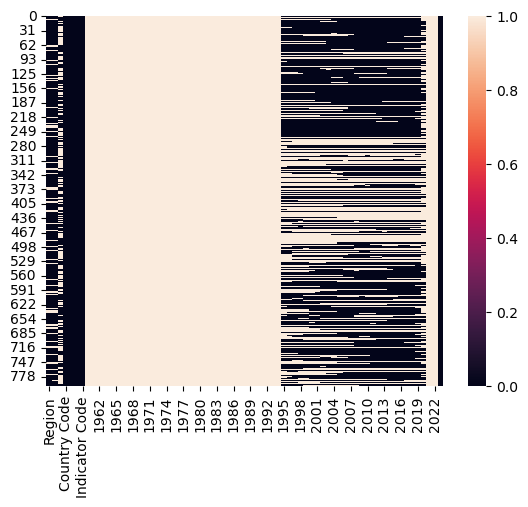

In [39]:
#check null values
sns.heatmap(tourism_df.isnull())

In [40]:
#keep only years between 1995 and 2019 (inclusive)
cols_to_keep = meta_columns + ['Country Name', 'Indicator Name', 'Indicator Code'] + [str(year) for year in range(1995,2020)]

In [41]:
#keep columns of interest and chosen year range
tourism_df = tourism_df[cols_to_keep]

In [42]:
#check the shape before
tourism_df.shape

(795, 32)

In [43]:
#melt year columns
years = [str(i) for i in range(1995, 2020)]
melted_df = tourism_df.melt(id_vars=meta_columns + ['Country Name', 'Indicator Name', 'Indicator Code'], 
                    value_vars=years, 
                    var_name='Year', 
                    value_name='Value')

In [44]:
melted_df.shape

(19875, 9)

In [45]:
#rename columns suitable for SQL table
column_mapping_dict = {
                    'Region':'region', 
                    'IncomeGroup':'income_group', 
                    'SpecialNotes':'special_notes',
                    'Country Code':'country_code',
                    'Country Name':'country_name',
                    'Indicator Name':'indicator_name',
                    'Indicator Code':'indicator_code',
                    'Year':'year',
                    'Value':'indicator_value'
                    
                    }
melted_df.rename(columns=column_mapping_dict, inplace=True)

In [46]:
#merge iso mapping to get subregions and regions
tourism_indicators_df = melted_df.merge(iso_mapping, left_on='country_code', right_on='alpha-3', how='left', indicator=True)

In [47]:
tourism_indicators_df.head(2)

,region_x,income_group,special_notes,country_code,country_name,indicator_name,indicator_code,year,indicator_value,name,...,alpha-3,country-code,iso_3166-2,region_y,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code,_merge
0,Latin America & Caribbean,High income,NaN,ABW,Aruba,"International tourism, number of arrivals",ST.INT.ARVL,1995,9.120000e+05,Aruba,...,ABW,533.0,ISO 3166-2:AW,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0,both
1,NaN,NaN,"26 countries, stretching from the Red Sea in t...",AFE,Africa Eastern and Southern,"International tourism, number of arrivals",ST.INT.ARVL,1995,1.158354e+07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [48]:
#check mappings to include
tourism_indicators_df[tourism_indicators_df['country_name'].str.lower().str.contains('dividend')]['country_name'].unique()

array(['Early-demographic dividend', 'Late-demographic dividend',
       'Pre-demographic dividend', 'Post-demographic dividend'],
      dtype=object)

In [49]:
#all unmatched columns are custom regions,  income groups, dispute regions
tourism_indicators_df[tourism_indicators_df['_merge']=='left_only']['country_name'].unique()

array(['Africa Eastern and Southern', 'Africa Western and Central',
       'Arab World', 'Central Europe and the Baltics', 'Channel Islands',
       'Caribbean small states',
       'East Asia & Pacific (excluding high income)',
       'Early-demographic dividend', 'East Asia & Pacific',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia', 'Euro area', 'European Union',
       'Fragile and conflict affected situations', 'High income',
       'Heavily indebted poor countries (HIPC)', 'IBRD only',
       'IDA & IBRD total', 'IDA total', 'IDA blend', 'IDA only',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & Caribbean',
       'Least developed countries: UN classification', 'Low income',
       'Lower middle income', 'Low & middle income',
       'Late-demographic dividend', 'Middle East & North Africa',
       'Middle income',
       'Middle East & North Africa (excluding high income)',
       'North America', 'OECD 

In [50]:
tourism_indicators_df.groupby(by=['_merge'])['country_name','alpha-3'].count()

/var/folders/yl/4_vyq5g94gs5w54zl2qykr9w0000gn/T/ipykernel_75650/917516037.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tourism_indicators_df.groupby(by=['_merge'])['country_name','alpha-3'].count()


,country_name,alpha-3
_merge,,
left_only,3750,0
right_only,0,0
both,16125,16125


In [51]:
tourism_indicators_df.head(3)

,region_x,income_group,special_notes,country_code,country_name,indicator_name,indicator_code,year,indicator_value,name,...,alpha-3,country-code,iso_3166-2,region_y,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code,_merge
0,Latin America & Caribbean,High income,NaN,ABW,Aruba,"International tourism, number of arrivals",ST.INT.ARVL,1995,9.120000e+05,Aruba,...,ABW,533.0,ISO 3166-2:AW,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0,both
1,NaN,NaN,"26 countries, stretching from the Red Sea in t...",AFE,Africa Eastern and Southern,"International tourism, number of arrivals",ST.INT.ARVL,1995,1.158354e+07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,South Asia,Low income,The reporting period for national accounts dat...,AFG,Afghanistan,"International tourism, number of arrivals",ST.INT.ARVL,1995,NaN,Afghanistan,...,AFG,4.0,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN,both


## 3. Data Profiling

In [52]:
tourism_indicators_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19875 entries, 0 to 19874
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   region_x                  16275 non-null  object  
 1   income_group              16200 non-null  object  
 2   special_notes             9450 non-null   object  
 3   country_code              19875 non-null  object  
 4   country_name              19875 non-null  object  
 5   indicator_name            19875 non-null  object  
 6   indicator_code            19875 non-null  object  
 7   year                      19875 non-null  object  
 8   indicator_value           13233 non-null  float64 
 9   name                      16125 non-null  object  
 10  alpha-2                   16050 non-null  object  
 11  alpha-3                   16125 non-null  object  
 12  country-code              16125 non-null  float64 
 13  iso_3166-2                16125 non-null  obje

In [53]:
tourism_indicators_df.describe()

,indicator_value,country-code,region-code,sub-region-code,intermediate-region-code
count,1.323300e+04,16125.000000,16125.000000,16125.000000,6750.000000
mean,1.138331e+10,432.027907,70.479070,177.265116,16.366667
std,7.167792e+10,252.623838,67.982668,134.745997,7.980357
min,7.000000e+02,4.000000,2.000000,15.000000,5.000000
25%,1.410000e+06,214.000000,2.000000,53.000000,11.000000
50%,2.128559e+07,430.000000,19.000000,154.000000,14.000000
75%,3.941552e+08,646.000000,142.000000,202.000000,18.000000
max,1.439121e+12,894.000000,150.000000,419.000000,29.000000


## 4. Data Insights

To make sense of data, let's dive into metadata csv files.

In [54]:
#arrivals
print(arrivals_indicator_meta['SOURCE_ORGANIZATION']),

print(arrivals_indicator_meta['SOURCE_NOTE'])

0    World Tourism Organization, Yearbook of Touris...
Name: SOURCE_ORGANIZATION, dtype: object
0    International inbound tourists (overnight visi...
Name: SOURCE_NOTE, dtype: object


In [55]:
#departures
print(departures_indicator_meta['SOURCE_ORGANIZATION']),

print(departures_indicator_meta['SOURCE_NOTE'])

0    World Tourism Organization, Yearbook of Touris...
Name: SOURCE_ORGANIZATION, dtype: object
0    International outbound tourists are the number...
Name: SOURCE_NOTE, dtype: object


In [56]:
#expenditure
print(expenditure_indicator_meta['SOURCE_ORGANIZATION']),

print(expenditure_indicator_meta['SOURCE_NOTE'])

0    World Tourism Organization, Yearbook of Touris...
Name: SOURCE_ORGANIZATION, dtype: object
0    International tourism expenditures are expendi...
Name: SOURCE_NOTE, dtype: object


### 4.1. Deviation analysis

- Test aggregations of mapped countries vs World to check deviations

In [57]:
#filter dataframe for world and prepare and aggregated view
world_df = tourism_indicators_df[tourism_indicators_df['country_name']=='World']
world_agg = world_df.groupby(['indicator_code', 'year'])['indicator_value'].sum().unstack()

In [58]:
#change format from scientific to a 2 decimal
pd.set_option('display.float_format', '{:.2f}'.format)

In [59]:
#preview
world_agg

year,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
indicator_code,,,,,,,,,,,,,,,,,,,,,
ST.INT.ARVL,1082522375.33,1143489092.75,1193996052.17,1209956781.39,1254467157.97,1332379078.84,1299004507.58,1319581840.29,1300066793.05,1436450364.26,...,1755720045.80,1792688016.34,1881196824.91,1952484358.48,2012330419.02,2071785909.76,2140443306.01,2248870723.88,2339399881.50,2403074088.46
ST.INT.DPRT,0.00,0.00,930066023.12,982125955.07,1043185310.63,1122419166.95,1121398703.98,1127808612.10,1130457013.89,1201164309.27,...,1457015079.92,1504559275.56,1564352744.62,1641229335.68,1651310269.20,1744980358.25,1820356515.25,1934268135.45,1991161436.61,2034431899.10
ST.INT.XPND.CD,501045482680.72,525332403372.72,524306149916.68,529210822595.79,535279428869.24,551273675403.37,538197393340.73,559532446364.17,614950949569.10,711890593974.73,...,1030432048940.33,1133385815319.83,1174881529184.04,1229615760322.04,1284202729509.27,1181523478579.01,1193724367473.88,1314055927207.01,1412736992372.23,1439120572186.10


In [60]:
#filter rows where region is mapped with iso_mapping file and create an aggregated view
mapped_countries_df = tourism_indicators_df[tourism_indicators_df['region_y'].notnull()]
mapped_countries_agg = mapped_countries_df.groupby(['indicator_code', 'year'])['indicator_value'].sum().unstack()
mapped_countries_agg

year,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
indicator_code,,,,,,,,,,,,,,,,,,,,,
ST.INT.ARVL,818154200.00,1009893400.00,1054704700.00,909541100.00,951716600.00,1013413700.00,989228600.00,1004996799.98,1031806300.01,1325222000.05,...,1623401400.00,1657402521.87,1731574990.63,1828452306.24,1881877259.35,1958521831.25,2027553784.38,2124673350.02,2207745523.46,2246732100.00
ST.INT.DPRT,401616000.00,423214000.00,541258000.00,618525900.00,658634300.00,724175300.00,724498500.00,728481700.00,756342600.00,790197300.00,...,1093155200.00,1126045599.42,1172056059.77,1232007057.04,1247445201.57,1313685800.00,1380142300.00,1480668300.00,1522993407.81,1537058392.19
ST.INT.XPND.CD,404422282146.45,425952828495.98,412753800000.67,416432299999.59,410973700001.10,429686700000.24,441216200000.58,476772299999.30,529705093943.18,605367939832.12,...,790091440003.60,859273780009.29,884276999997.76,925476600018.79,967378999998.76,928958799605.75,937972579056.26,1028799168812.27,1105869200450.99,1043858100255.97


In [61]:
#substract 2 dataframes
deviation_df = mapped_countries_agg - world_agg
deviation_df

year,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
indicator_code,,,,,,,,,,,,,,,,,,,,,
ST.INT.ARVL,-264368175.33,-133595692.75,-139291352.17,-300415681.39,-302750557.97,-318965378.85,-309775907.58,-314585040.31,-268260493.04,-111228364.21,...,-132318645.80,-135285494.47,-149621834.28,-124032052.24,-130453159.66,-113264078.51,-112889521.64,-124197373.87,-131654358.04,-156341988.46
ST.INT.DPRT,401616000.00,423214000.00,-388808023.12,-363600055.07,-384551010.63,-398243866.95,-396900203.98,-399326912.10,-374114413.89,-410967009.27,...,-363859879.92,-378513676.14,-392296684.85,-409222278.64,-403865067.64,-431294558.24,-440214215.25,-453599835.45,-468168028.80,-497373506.91
ST.INT.XPND.CD,-96623200534.27,-99379574876.74,-111552349916.01,-112778522596.20,-124305728868.14,-121586975403.13,-96981193340.14,-82760146364.87,-85245855625.92,-106522654142.61,...,-240340608936.73,-274112035310.54,-290604529186.28,-304139160303.25,-316823729510.51,-252564678973.26,-255751788417.62,-285256758394.74,-306867791921.24,-395262471930.13


In [62]:
#check in relative terms
relative_deviation_df = (deviation_df / world_agg)*100
relative_deviation_df

year,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
indicator_code,,,,,,,,,,,,,,,,,,,,,
ST.INT.ARVL,-24.42,-11.68,-11.67,-24.83,-24.13,-23.94,-23.85,-23.84,-20.63,-7.74,...,-7.54,-7.55,-7.95,-6.35,-6.48,-5.47,-5.27,-5.52,-5.63,-6.51
ST.INT.DPRT,inf,inf,-41.80,-37.02,-36.86,-35.48,-35.39,-35.41,-33.09,-34.21,...,-24.97,-25.16,-25.08,-24.93,-24.46,-24.72,-24.18,-23.45,-23.51,-24.45
ST.INT.XPND.CD,-19.28,-18.92,-21.28,-21.31,-23.22,-22.06,-18.02,-14.79,-13.86,-14.96,...,-23.32,-24.19,-24.73,-24.73,-24.67,-21.38,-21.42,-21.71,-21.72,-27.47


In [63]:
#avoid divide by zero
relative_deviation_df.replace([np.inf, -np.inf], np.nan, inplace=True)

<Axes: xlabel='year', ylabel='indicator_code'>

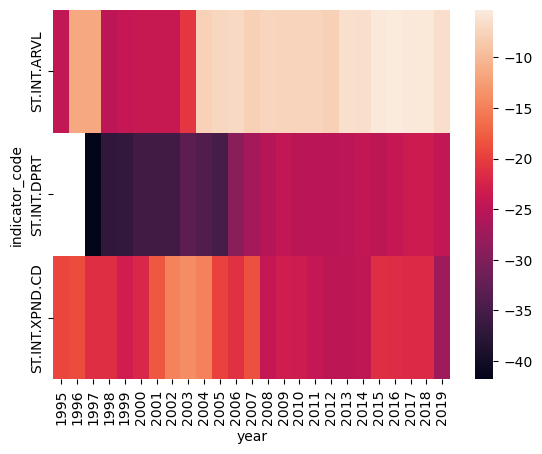

In [64]:
#created visual map
sns.heatmap(relative_deviation_df)

Overall, we need to make sure that the end user doesn't aggregate across all numbers.
This would be resolved by parameterized views, where it's possible to view either grain of of the report (world, country, income).
It is interesting to see that the bigger deivation comes in early years of Departure.


### 4.2. Time Series

There is an apparent increase in outbound/inbound visitors between 2006-2009:
- How does it look if we split US/non-US?
- What is the ration of outbound/inboud visitors over time?

Expenditure was affected during 2 crisises.

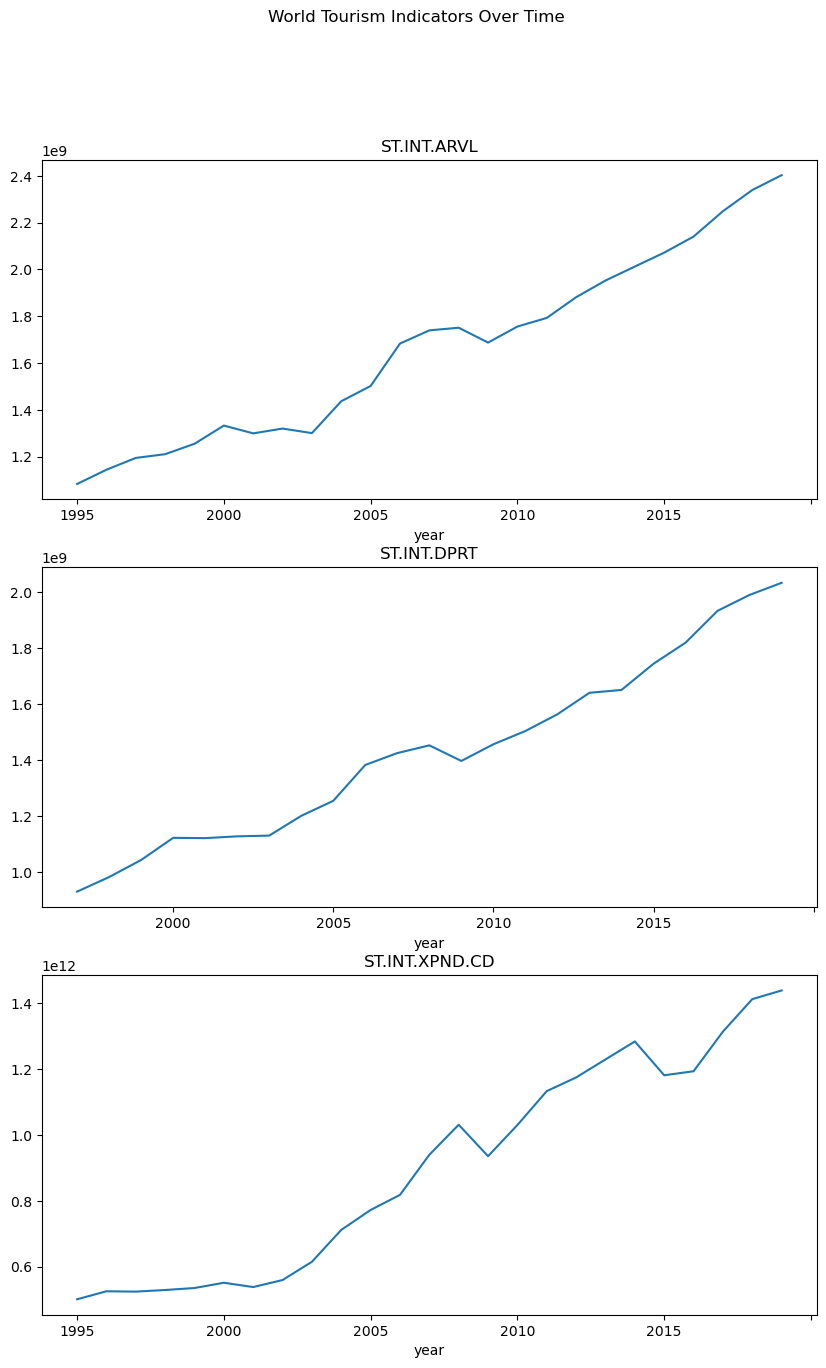

In [65]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))
fig.suptitle('World Tourism Indicators Over Time')
world_chart = world_df.pivot(index='year', columns='indicator_code', values='indicator_value')
for i, indicator in enumerate(world_chart.columns):
    world_chart[indicator].plot(ax=ax[i], title=indicator)
plt.show()


## 5. Prepare final data model for analysis on Tableau

In [66]:
#this would be different views that end users could work with
income = ['low income', 'lower middle income','low & middle income', 'low & middle income', 'low & middle income', 'middle income', 'high income','upper middle income']
aggregates = ['world','euro area', 'european union']
demographic = ['early-demographic dividend', 'late-demographic dividend','pre-demographic dividend', 'post-demographic dividend']
iso_countries = iso_mapping['alpha-3'].to_list()

In [67]:
#function to map report level based on country name or country code
def classify_country(row):
    if row['country_name'].lower() in income:
        return 'income'
    elif row['country_name'].lower() in aggregates:
        return 'aggregates'
    elif row['country_name'].lower() in demographic:
        return 'demographic'
    elif row['country_code'] in iso_countries:
        return 'countries'
    else:
        return 'other'

In [68]:
melted_df['report_view'] = melted_df.apply(classify_country,axis=1)

In [69]:
melted_df.head(3)

,region,income_group,special_notes,country_code,country_name,indicator_name,indicator_code,year,indicator_value,report_view
0,Latin America & Caribbean,High income,NaN,ABW,Aruba,"International tourism, number of arrivals",ST.INT.ARVL,1995,912000.00,countries
1,NaN,NaN,"26 countries, stretching from the Red Sea in t...",AFE,Africa Eastern and Southern,"International tourism, number of arrivals",ST.INT.ARVL,1995,11583544.71,other
2,South Asia,Low income,The reporting period for national accounts dat...,AFG,Afghanistan,"International tourism, number of arrivals",ST.INT.ARVL,1995,NaN,countries


In [70]:
other_report_levels = melted_df[melted_df['report_view']=='other']['country_name'].unique()
other_report_levels

array(['Africa Eastern and Southern', 'Africa Western and Central',
       'Arab World', 'Central Europe and the Baltics', 'Channel Islands',
       'Caribbean small states',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'IBRD only',
       'IDA & IBRD total', 'IDA total', 'IDA blend', 'IDA only',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & Caribbean',
       'Least developed countries: UN classification',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'North America', 'OECD members', 'Other small states',
       'Pacific island small states', 'South Asia',
       'Sub-Saharan Africa (excluding high income)', 'Sub-Saharan Africa',
       'Small states', 'East Asia & P

#TODO:
- improve mapping in case new variations of values would come up, e.g. low & middle income, lower income etc
- discuss with stakeholders how to handle Kosovo, for now excluded from the view
- discuss with stakeholders if other report levels would be in any interest
- discuss scheduling frequency, i assume the data would be coming once a year